<a href="https://colab.research.google.com/github/Taeu/FPO/blob/master/MIS_FULL_MONTH_VISUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
import json
import pandas as pd
from bs4 import BeautifulSoup
import urllib
from urllib import request
import re
import numpy as np
import datetime
client_id = 'haQoQuQqDY8FwcshDiBY'
client_secret = ###
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!pip install finance-datareader

In [2]:
file_path = 'gdrive/My Drive/Colab Notebooks/kospi200_구성종목_주가_시가총액등'
file_name1 = 'kospi200_pdf_comp_20140101_20190931.xlsx'
file_name2 = 'kospi200_pdf_mkt_cap_201401_201909.xlsx'
file_name3 = 'kospi200_pdf_mkt_weight_201401_201909.xlsx'
kp200 = pd.read_excel(file_path+'/'+file_name1)
kp200_codes_list = kp200[:200].code
len(kp200_codes_list)
kp200_codes_list = kp200_codes_list.tolist()
kp200_names_list =kp200[:200].name.tolist()
kp_informations = pd.read_excel(file_path+'/'+'상장법인목록.xlsx')
#kp_informations.head(3)
kp_company_name_list = kp_informations['회사명'].tolist()
kp200  = []
for a in kp_company_name_list:
  if a in kp200_names_list:
    kp200.append(a)
len(kp200)

156

# 1번째 crowling test

In [0]:
def get_trend(body):
    url = "https://openapi.naver.com/v1/datalab/search"

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type", "application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))

    return json.loads(response.read().decode('utf-8'))
print(len(kp_informations))
kp_informations_names = kp_informations.회사명.values.tolist()
idx = 0
drop_idx = []
i = 0
for name in kp_informations_names:
  if name not in kp200_names_list:
    drop_idx.append(i)
  i+=1
print(len(drop_idx))
kp200_inform = kp_informations.drop(drop_idx)
len(kp200_inform)

# 자동화를 위해, 그리고 같은 스케일을 가져오기 위해 하나씩 분석
from tqdm import tqdm
from datetime import datetime
names = kp200_inform.회사명.values
body_dict = {
    "startDate": "2017-01-01",
    "endDate": "2019-08-30",
    "timeUnit": "month",
}


for idx in tqdm(range(len(names))): # names
  name = names[idx]
  body_dict['keywordGroups'] = [{'groupName': name,'keywords':[name]}]
  body= json.dumps(body_dict)
  result = get_trend(body)
  
  if idx == 0 :
    data = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data])
    value = np.array([i['ratio'] for i in data])
    data = pd.DataFrame({'Time':time, idx : value})
  elif idx >= 1 : 
    data1 = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data1])
    value = np.array([i['ratio'] for i in data1])
    data1 = pd.DataFrame({'Time':time, idx : value})
    data = pd.merge(data,data1,on = ['Time'], sort= False)

  0%|          | 0/156 [00:00<?, ?it/s]

2323
2167


100%|██████████| 156/156 [01:58<00:00,  1.34it/s]


In [0]:
data.head(2)

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,2017-01-01,43.72161,19.74505,17.66914,32.85988,63.86691,37.47653,28.87101,31.93815,78.53634,49.83815,39.94744,42.91416,51.02294,24.40373,8.39446,70.93588,15.31347,64.07475,21.71775,49.43882,35.39637,85.77449,81.97265,27.60246,9.76038,26.86905,15.02446,41.08940,54.83203,97.95099,84.18119,66.19779,43.60207,70.92457,31.73296,49.75161,38.06789,14.24580,61.89031,...,5.54726,40.69591,31.59377,29.43351,39.38257,13.89004,2.94492,68.45954,38.37247,26.41657,28.71880,96.86986,100.0000,42.20552,44.71925,34.17128,63.36743,100.00000,25.28285,31.48395,26.14671,35.78170,61.45965,65.93993,54.26127,97.92900,5.64161,5.69028,37.81547,25.56566,48.13649,78.09778,36.78169,26.59406,42.73682,23.55416,48.72385,66.23435,2.36899,33.65981
1,2017-02-01,53.56684,37.10157,19.44558,33.28598,86.54984,38.62657,31.64756,31.90171,67.51832,47.86242,41.22553,34.12447,56.01109,27.51968,11.25255,53.64130,22.08802,78.32162,15.60033,51.63127,29.71001,84.08165,79.22083,31.51241,10.92724,40.13374,14.48588,39.29315,61.10914,100.00000,75.18661,68.16328,45.79270,75.75690,41.15021,51.08634,43.68390,15.53373,55.99218,...,6.28368,58.58699,32.77358,28.27607,41.41515,12.49316,2.90744,76.14196,47.62116,23.84440,26.48603,95.49774,89.8897,47.67705,16.25300,38.76634,65.08098,76.93098,21.96788,32.57432,25.62505,28.38331,52.76965,65.08923,50.55845,63.39207,5.98034,5.85112,38.60165,25.08017,54.18564,69.96069,28.68658,27.47765,41.34119,21.85170,48.90291,63.55181,2.72440,34.29173


In [0]:
#data.to_excel("kp200_trend_timeseries.xlsx")
data.to_csv(file_path+'/'+"kp200_trend_ts_month2.csv", mode='w') # 다시 불러올때 Time 형으로 변환, 굳이 필요한가 싶지만..

# From Now on let's data analysis from different Time Series

In [3]:
data_new = pd.read_csv(file_path+'/'+"kp200_trend_ts_month2.csv", index_col=0)
data_new.head(3)

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,2017-01-01,43.72161,19.74505,17.66914,32.85988,63.86691,37.47653,28.87101,31.93815,78.53634,49.83815,39.94744,42.91416,51.02294,24.40373,8.39446,70.93588,15.31347,64.07475,21.71775,49.43882,35.39637,85.77449,81.97265,27.60246,9.76038,26.86905,15.02446,41.08940,54.83203,97.95099,84.18119,66.19779,43.60207,70.92457,31.73296,49.75161,38.06789,14.24580,61.89031,...,5.54726,40.69591,31.59377,29.43351,39.38257,13.89004,2.94492,68.45954,38.37247,26.41657,28.71880,96.86986,100.00000,42.20552,44.71925,34.17128,63.36743,100.00000,25.28285,31.48395,26.14671,35.78170,61.45965,65.93993,54.26127,97.92900,5.64161,5.69028,37.81547,25.56566,48.13649,78.09778,36.78169,26.59406,42.73682,23.55416,48.72385,66.23435,2.36899,33.65981
1,2017-02-01,53.56684,37.10157,19.44558,33.28598,86.54984,38.62657,31.64756,31.90171,67.51832,47.86242,41.22553,34.12447,56.01109,27.51968,11.25255,53.64130,22.08802,78.32162,15.60033,51.63127,29.71001,84.08165,79.22083,31.51241,10.92724,40.13374,14.48588,39.29315,61.10914,100.00000,75.18661,68.16328,45.79270,75.75690,41.15021,51.08634,43.68390,15.53373,55.99218,...,6.28368,58.58699,32.77358,28.27607,41.41515,12.49316,2.90744,76.14196,47.62116,23.84440,26.48603,95.49774,89.88970,47.67705,16.25300,38.76634,65.08098,76.93098,21.96788,32.57432,25.62505,28.38331,52.76965,65.08923,50.55845,63.39207,5.98034,5.85112,38.60165,25.08017,54.18564,69.96069,28.68658,27.47765,41.34119,21.85170,48.90291,63.55181,2.72440,34.29173
2,2017-03-01,38.36064,38.13322,21.65651,38.50578,100.00000,42.75800,14.91797,36.69373,95.29140,49.21031,44.48684,36.96195,100.00000,36.49394,9.58220,52.44176,24.09486,71.53579,13.43246,54.77552,39.71363,91.50881,88.16072,32.98712,11.00333,45.78933,17.27775,48.14206,88.16579,90.06956,80.88003,85.26528,49.07005,64.89841,52.28400,63.12177,57.67597,20.66730,63.00819,...,6.87462,100.00000,42.56029,32.14764,56.87115,16.38484,3.85143,73.90433,47.62987,32.83884,29.83730,100.00000,82.77965,77.15629,21.35118,60.76497,71.43222,79.70994,26.58172,56.07623,28.60060,32.22285,33.30367,57.91892,53.19246,83.48408,6.41734,5.92488,58.25733,36.44916,59.44895,100.00000,28.68055,30.06872,68.76814,22.40738,63.11107,66.66638,2.37305,26.61997


In [5]:
kp_informations_names = kp_informations.회사명.values.tolist()
idx = 0
drop_idx = []
i = 0
for name in kp_informations_names:
  if name not in kp200_names_list:
    drop_idx.append(i)
  i+=1
print(len(drop_idx))
kp200_inform = kp_informations.drop(drop_idx)
len(kp200_inform)

# 자동화를 위해, 그리고 같은 스케일을 가져오기 위해 하나씩 분석
from tqdm import tqdm
from datetime import datetime
names = kp200_inform.회사명.values

2167


In [7]:
names[:10]

array(['세아제강', '한일시멘트', 'SK케미칼', '동아타이어', '롯데제과', '오리온', '크라운제과', '한솔제지',
       '삼성물산', '만도'], dtype=object)

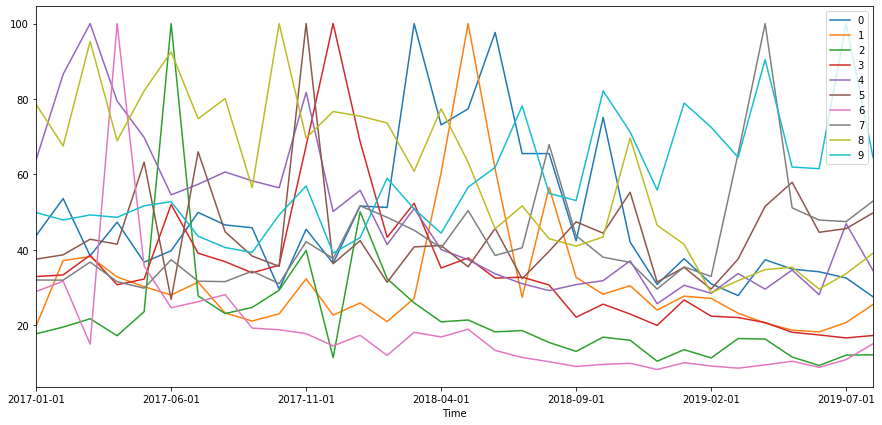

In [10]:
import matplotlib.pyplot as plt
names = kp200_inform.회사명.values
data_new_10 = data_new[['Time', '0', '1','2','3','4','5','6','7','8','9']]
# '세아제강', '한일시멘트', 'SK케미칼', '동아타이어', '롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산', '만도'
data_new_10.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output10.png')

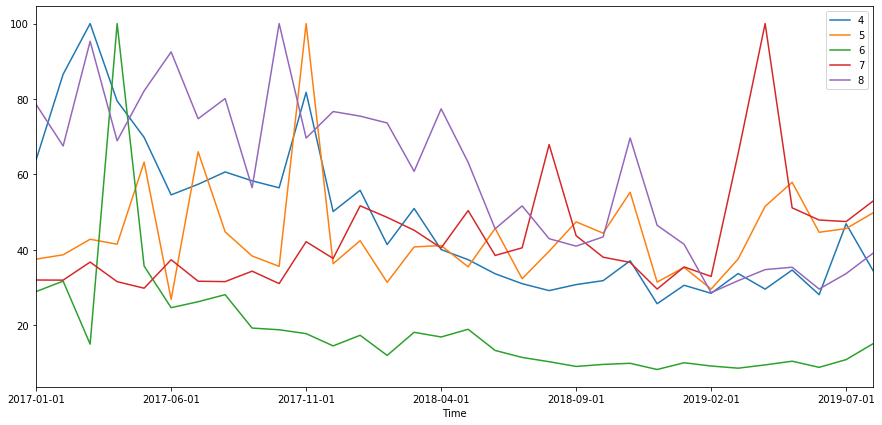

In [12]:
import matplotlib.pyplot as plt
names = kp200_inform.회사명.values
data_new_5 = data_new[['Time', '4','5','6','7','8']]
# '세아제강', '한일시멘트', 'SK케미칼', '동아타이어', '롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산', '만도'
data_new_5.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output5.png')

# Change rate 활용

In [0]:
trend_indexs = data_new[str(1)].values.tolist()
changes = []
for j in range(1,len(trend_indexs)):
  changes.append(trend_indexs[j]/trend_indexs[j-1]-1)
print(len(changes))
print(changes[:5])

31
[0.8790314534528909, 0.027806100927804334, -0.14116431814570074, -0.07882065955688189, -0.07353628486136987]


In [0]:
data_new_change_rate = pd.DataFrame()
data_new_change_rate['Time'] = data_new['Time'][1:]
for i in range(156):
  trend_indexs = data_new[str(i)].values.tolist()
  changes = []
  for j in range(1,len(trend_indexs)):
    changes.append(trend_indexs[j]/trend_indexs[j-1] - 1)
  data_new_change_rate[str(i)] = changes

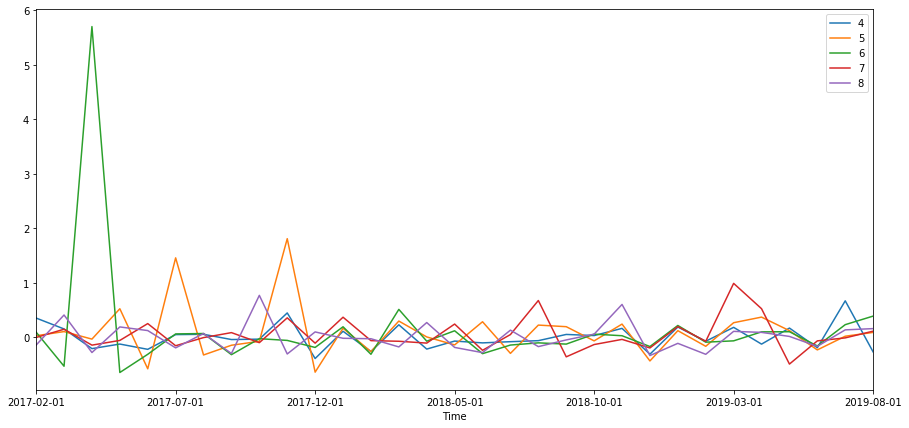

In [13]:
data_new_5 = data_new_change_rate[['Time', '4','5','6','7','8']]
#'롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산'
data_new_5.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output5_change_rate.png')

In [0]:
df_ch = data_new_change_rate.drop(['Time'],axis=1)
df_ch.shape
df_ch.values.shape # (242, 156)

df_ch_np = df_ch.to_numpy()
df_ch_np = df_ch_np.T
df_ch_np.shape # (156, 242)

(156, 31)

In [0]:
def cos_matrix_multiplication(matrix, vector):
    """
    Calculating pairwise cosine distance using matrix vector multiplication.
    """
    dotted = matrix.dot(vector)
    matrix_norms = np.linalg.norm(matrix, axis=1)
    vector_norm = np.linalg.norm(vector)
    matrix_vector_norms = np.multiply(matrix_norms, vector_norm)
    neighbors = np.divide(dotted, matrix_vector_norms)
    return neighbors

In [0]:
from tqdm import tqdm
wl = []
for i in tqdm(range(len(df_ch_np)),mininterval = 3):
    nearest = list(cos_matrix_multiplication(df_ch_np, df_ch_np[i]).argsort()[-11:-1][::-1])
    li = []
    for x in nearest:
        li.append(x)
    wl.append(li)
wl =  np.asarray(wl)
print(wl.shape)
#np.save(directory+'article_similarity_recent_t',wl)

100%|██████████| 156/156 [00:00<00:00, 12689.80it/s]

(156, 10)


In [0]:
for i in range(156):
  print('company name : ',names[i],end="'s ")
  print('most similarly company are :', end = ' ')
  for j in wl[i]:
    print(names[j], end= ' ')
  print()

In [0]:
# Let's do the clustering for Stock Portfolio

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [0]:
df_ch_np.shape

(156, 31)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(df_ch_np)
y_kmeans = kmeans.predict(df_ch_np)

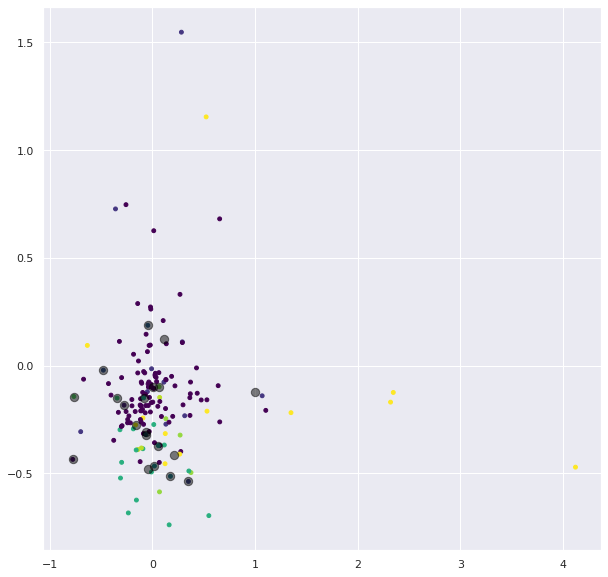

In [0]:
fig = plt.subplots(figsize=(10,10))
plt.scatter(df_ch_np[:, 7], df_ch_np[:,16], c=y_kmeans, s=15, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 7], centers[:,16], c='black', s=70, alpha=0.5);

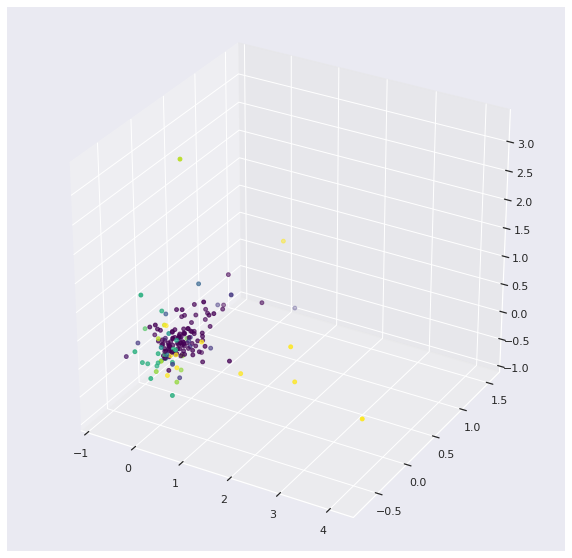

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_ch_np[:,7], df_ch_np[:,16],df_ch_np[:,4], c=y_kmeans, s=15, cmap='viridis')

#centers = kmeans.cluster_centers_
#ax.scatter(centers[:, 3], centers[:, 7],df_ch_np[:,80], c='black', s=70, alpha=0.5);

In [0]:
y_kmeans

array([ 1, 12, 15,  1,  1,  1, 14,  1,  1,  1,  1,  1,  1, 12, 12, 12,  1,
        1,  5,  1,  1,  1,  1,  1,  6,  1, 17,  1,  1,  1,  1,  1,  1,  1,
       12,  1,  1, 13,  1,  1,  7,  8,  1, 11,  1,  1,  1,  1, 12,  1,  1,
        1, 11,  1,  1, 12,  1, 19,  1, 12,  1, 12, 13,  1, 12, 12, 15, 12,
       12,  1, 15,  1,  1,  1,  1, 12,  1,  1, 12,  1,  1, 12, 12, 12,  3,
        1,  1, 12,  1, 13, 12,  1, 18,  1,  1, 12, 11,  1, 12,  1,  1,  1,
        1,  1,  1, 11, 12,  1,  9,  1,  1,  1,  1,  1,  1, 12, 12,  1, 12,
        1,  1, 12,  2,  1, 13,  1, 12,  1,  1,  1, 16,  1,  1,  1, 16, 12,
        1,  1, 12,  1,  1, 12, 10,  0,  1,  1,  1,  1, 13, 12,  1, 12,  1,
        1,  4,  1], dtype=int32)

In [0]:
li_cl=[]
for i in range(20):
  li_cl.append(0)
for i in y_kmeans:
  li_cl[i] += 1
li_cl

[1, 95, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 33, 5, 1, 3, 2, 1, 1, 1]

In [0]:
data_new_change_rate.head(3)

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
1,2017-02-01,0.225180,0.879031,0.100539,0.012967,0.355159,0.030687,0.096171,-0.001141,-0.140292,-0.039643,0.031994,-0.204820,0.097763,0.127683,0.340473,-0.243806,0.442392,0.222348,-0.281678,0.044347,-0.160648,-0.019736,-0.033570,0.141652,0.119551,0.493679,-0.035847,-0.043716,0.114479,0.020919,-0.106848,0.029691,0.050241,0.068133,0.296766,0.026828,0.147526,0.090408,-0.095300,...,0.132754,0.439628,0.037343,-0.039324,0.051611,-0.100567,-0.012727,0.112218,0.241024,-0.097370,-0.077746,-0.014165,-0.101103,0.129640,-0.636555,0.134471,0.027041,-0.230690,-0.131115,0.034633,-0.019951,-0.206765,-0.141394,-0.012901,-0.068241,-0.352673,0.060041,0.028266,0.020790,-0.018990,0.125667,-0.104191,-0.220085,0.033225,-0.032656,-0.072279,0.003675,-0.040501,0.150026,0.018774
2,2017-03-01,-0.283873,0.027806,0.113698,0.156817,0.155404,0.106958,-0.528622,0.150212,0.411341,0.028162,0.079109,0.083151,0.785361,0.326103,-0.148442,-0.022362,0.090856,-0.086641,-0.138963,0.060898,0.336709,0.088333,0.112848,0.046798,0.006963,0.140919,0.192730,0.225202,0.442759,-0.099304,0.075724,0.250898,0.071569,-0.143333,0.270565,0.235590,0.320303,0.330479,0.125303,...,0.094044,0.706864,0.298616,0.136920,0.373197,0.311505,0.324681,-0.029388,0.000183,0.377214,0.126530,0.047145,-0.079097,0.618311,0.313676,0.567467,0.097590,0.036123,0.210027,0.721486,0.116119,0.135275,-0.368886,-0.110161,0.052098,0.316948,0.073073,0.012606,0.509193,0.453306,0.097135,0.429374,-0.000210,0.094297,0.663429,0.025430,0.290538,0.049008,-0.128964,-0.223720
3,2017-04-01,0.232931,-0.141164,-0.207756,-0.203430,-0.205484,-0.030835,5.703325,-0.141590,-0.277068,-0.012895,-0.166945,-0.067085,-0.417124,0.257065,0.094836,-0.043566,-0.157373,-0.063315,-0.164969,0.012154,-0.272955,-0.177591,-0.216551,-0.088786,-0.174288,-0.263958,-0.137590,-0.112545,-0.324804,-0.015086,-0.060833,-0.256338,-0.141457,0.022519,-0.296809,-0.312324,-0.297067,-0.319079,-0.147842,...,-0.262506,-0.246650,-0.237255,-0.278787,-0.195831,0.612386,23.129679,-0.179542,-0.092626,-0.165422,-0.197444,-0.266562,-0.110819,0.050215,0.412410,-0.277292,-0.093806,-0.069114,-0.218002,-0.228374,-0.089098,0.138890,-0.023384,-0.048159,-0.199707,-0.399844,-0.028104,-0.074256,-0.281661,0.637646,-0.275561,-0.127747,-0.003959,-0.195699,-0.236058,-0.173713,-0.262734,-0.138693,-0.119150,-0.087080


In [0]:
# optimization
import FinanceDataReader as fdr
kodex_df = fdr.DataReader('069500', '2019-09-01', '2019-11-01')

In [0]:
kodex_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-09-02,25775,25919,25745,25855,5522110,0.001744
2019-09-03,25784,25924,25705,25755,5531496,-0.003868
2019-09-04,25735,26139,25710,26139,4401808,0.014910
2019-09-05,26183,26553,26169,26369,6303976,0.008799
2019-09-06,26548,26558,26423,26488,6789757,0.004513


In [0]:
kodex_df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-10-28,27839,27964,27769,27825,4096113,0.003788
2019-10-29,27934,27969,27720,27765,5513969,-0.002156
2019-10-30,27795,27795,27535,27555,9460197,-0.007563
2019-10-31,27700,27935,27610,27660,8898602,0.003811
2019-11-01,27645,27870,27580,27870,6454065,0.007592


In [0]:
kodex_close = kodex_df.Close.tolist()
kodex_return = []
for i in range(len(kodex_close)):
  kodex_return.append(kodex_close[i]/kodex_close[0])

In [0]:
kp_informations_names = kp_informations.회사명.values.tolist()
idx = 0
drop_idx = []
i = 0
for name in kp_informations_names:
  if name not in kp200_names_list:
    drop_idx.append(i)
  i+=1
print(len(drop_idx))
kp200_inform = kp_informations.drop(drop_idx)
len(kp200_inform)

# 자동화를 위해, 그리고 같은 스케일을 가져오기 위해 하나씩 분석
from tqdm import tqdm
from datetime import datetime
names = kp200_inform.회사명.values

2167


In [0]:
names_list = names.tolist()
#y_kmeans
codes_list = []
for name in names_list:
  for i in range(len(kp200_names_list)):
    if kp200_names_list[i] == name:
      codes_list.append(kp200_codes_list[i][1:])
      break
len(codes_list)

156

In [0]:
len(kodex_return)

41

In [0]:
kospi_156 = pd.DataFrame()
for code_idx in tqdm(range(len(codes_list))):
  close_list = fdr.DataReader(codes_list[code_idx], '2019-09-01', '2019-11-01').Close.tolist()
  # 여기서 작업을 하는게 더 좋겠지??
  if(len(close_list)==len(kodex_return)):
    kospi_156[codes_list[code_idx]] = close_list
  else:
    print(names_list[code_idx],'is shorter than kodex200')
    close_list = []
    for i in range(len(kodex_return)):
      close_list.append(1.0)
    kospi_156[codes_list[code_idx]] = close_list

  6%|▌         | 9/156 [00:12<03:34,  1.46s/it]

삼성물산 is shorter than kodex200


 17%|█▋        | 27/156 [00:34<02:44,  1.28s/it]

SK is shorter than kodex200


100%|██████████| 156/156 [03:32<00:00,  1.47s/it]


In [0]:
kospi_156.head()

,003030,003300,006120,007340,004990,001800,005740,004150,000830,060980,044820,079980,007070,078520,047810,139480,020150,011210,128940,033920,103130,032830,088350,120110,115390,052690,003600,000080,108670,105630,035420,105560,104700,103140,011070,032640,097950,097230,096770,029780,...,000720,010620,006360,006400,009150,005180,003920,006260,001740,004430,000430,003570,004370,001630,000880,000670,002240,002350,000210,001120,003240,002020,005930,007570,009830,006380,000140,004800,001040,000150,003520,002270,001680,003550,000640,001440,000070,003490,000100,000120
0,51100,47700,22350,30750,33650,15750,10700,4340,1.0,42900,13400,6290,39200,10100,39400,113500,42450,44400,284000,9000,914,68300,2460,39800,12250,18050,1.0,23700,60700,18700,150000,39600,4935,22150,99100,13200,226000,4840,165500,33400,...,41150,41650,31900,246000,90000,57300,511000,45450,5370,18700,3750,6360,234500,87800,24450,574000,23400,9440,96500,17150,1066000,15250,43800,20400,17200,3515,10800,87100,81300,79167,4545,444000,21750,71200,87700,593,59900,22300,226000,146000
1,51300,48400,22800,30700,33800,16300,10750,4330,1.0,43050,13700,6350,40100,11250,39900,114000,41800,44000,282000,8850,914,67600,2445,40150,12700,17950,1.0,24250,60700,18350,150500,39450,4940,22000,99900,13200,224500,4825,162500,33150,...,41150,41650,31900,246500,90400,57000,507000,45850,5450,18750,3820,6280,241500,88500,24500,583000,23450,9320,96500,16800,1122000,15450,43250,20600,17350,3540,11100,86600,80600,79167,4690,448500,21750,70900,88200,595,60500,22200,226000,142000
2,51600,48050,23050,30650,34050,16400,10750,4290,1.0,43600,13700,6310,41200,11300,41750,114000,42150,46750,285000,8950,914,67700,2445,40900,12950,18300,1.0,25550,61600,18650,151000,40050,4900,22150,104500,13350,226500,4780,161500,33500,...,41450,41850,31750,246000,92700,56700,512000,45550,5460,18650,3855,6370,251500,96000,24500,580000,23200,9340,95200,16950,1114000,15600,44100,21000,17400,3530,11200,87100,81400,79955,4700,448500,22150,71700,88700,591,62000,22350,228000,142500
3,51400,48000,22900,30500,33950,16150,10950,4285,1.0,43100,13600,6320,40300,11150,41050,112500,41750,48450,280500,9010,914,69000,2445,40950,12700,18150,1.0,25900,61400,18550,147000,39750,4895,22400,105000,13250,229500,4760,164000,32950,...,41950,41950,32300,244000,98200,56200,504000,46200,5410,18950,3855,6220,244500,94000,24300,577000,23100,9240,95800,17400,1104000,15400,45700,20800,17900,3580,11150,87800,81600,79955,4655,442500,21850,71100,87300,585,61000,22500,227500,140000
4,50500,47900,22450,30750,33950,16050,10850,4335,1.0,42300,13550,6280,40900,11200,41600,112000,41950,48650,280500,8970,914,68200,2395,42100,12450,18000,1.0,25950,60100,19200,149500,40550,4890,22300,103000,13100,227500,4755,164500,33200,...,42400,42700,32050,244000,97200,56200,498500,46950,5310,18800,3830,6300,240000,92300,24300,575000,22650,9120,97100,17000,1095000,15900,46300,20800,17750,3570,11050,87700,80600,80349,4620,434500,21600,71900,86800,579,61200,22650,227500,136500


In [0]:
b = kospi_156.columns
for i in range(len(b)):
  kospi_156[b[i]] = kospi_156[b[i]].astype('float32')

In [0]:
#data.to_excel("kp200_trend_timeseries.xlsx")
#data.to_csv(file_path+'/'+"kp200_trend_ts_month3.csv", mode='w') # 다시 불러올때 Time 형으로 변환, 굳이 필요한가 싶지만..

#data_new = pd.read_csv(file_path+'/'+"kp200_trend_ts_month3.csv", index_col=0)
#data_new.head(3)

kospi_156.to_csv(file_path + '/' + "kp156_1.csv",mode='w')

In [0]:
new_kospi_156 = pd.read_csv(file_path + '/' + "kp156_1.csv")
new_kospi_156 = new_kospi_156.drop(['Unnamed: 0'],axis=1)
new_kospi_156.head()

,003030,003300,006120,007340,004990,001800,005740,004150,000830,060980,044820,079980,007070,078520,047810,139480,020150,011210,128940,033920,103130,032830,088350,120110,115390,052690,003600,000080,108670,105630,035420,105560,104700,103140,011070,032640,097950,097230,096770,029780,...,000720,010620,006360,006400,009150,005180,003920,006260,001740,004430,000430,003570,004370,001630,000880,000670,002240,002350,000210,001120,003240,002020,005930,007570,009830,006380,000140,004800,001040,000150,003520,002270,001680,003550,000640,001440,000070,003490,000100,000120
0,51100.0,47700.0,22350.0,30750.0,33650.0,15750.0,10700.0,4340.0,1.0,42900.0,13400.0,6290.0,39200.0,10100.0,39400.0,113500.0,42450.0,44400.0,284000.0,9000.0,914.0,68300.0,2460.0,39800.0,12250.0,18050.0,1.0,23700.0,60700.0,18700.0,150000.0,39600.0,4935.0,22150.0,99100.0,13200.0,226000.0,4840.0,165500.0,33400.0,...,41150.0,41650.0,31900.0,246000.0,90000.0,57300.0,511000.0,45450.0,5370.0,18700.0,3750.0,6360.0,234500.0,87800.0,24450.0,574000.0,23400.0,9440.0,96500.0,17150.0,1066000.0,15250.0,43800.0,20400.0,17200.0,3515.0,10800.0,87100.0,81300.0,79167.0,4545.0,444000.0,21750.0,71200.0,87700.0,593.0,59900.0,22300.0,226000.0,146000.0
1,51300.0,48400.0,22800.0,30700.0,33800.0,16300.0,10750.0,4330.0,1.0,43050.0,13700.0,6350.0,40100.0,11250.0,39900.0,114000.0,41800.0,44000.0,282000.0,8850.0,914.0,67600.0,2445.0,40150.0,12700.0,17950.0,1.0,24250.0,60700.0,18350.0,150500.0,39450.0,4940.0,22000.0,99900.0,13200.0,224500.0,4825.0,162500.0,33150.0,...,41150.0,41650.0,31900.0,246500.0,90400.0,57000.0,507000.0,45850.0,5450.0,18750.0,3820.0,6280.0,241500.0,88500.0,24500.0,583000.0,23450.0,9320.0,96500.0,16800.0,1122000.0,15450.0,43250.0,20600.0,17350.0,3540.0,11100.0,86600.0,80600.0,79167.0,4690.0,448500.0,21750.0,70900.0,88200.0,595.0,60500.0,22200.0,226000.0,142000.0
2,51600.0,48050.0,23050.0,30650.0,34050.0,16400.0,10750.0,4290.0,1.0,43600.0,13700.0,6310.0,41200.0,11300.0,41750.0,114000.0,42150.0,46750.0,285000.0,8950.0,914.0,67700.0,2445.0,40900.0,12950.0,18300.0,1.0,25550.0,61600.0,18650.0,151000.0,40050.0,4900.0,22150.0,104500.0,13350.0,226500.0,4780.0,161500.0,33500.0,...,41450.0,41850.0,31750.0,246000.0,92700.0,56700.0,512000.0,45550.0,5460.0,18650.0,3855.0,6370.0,251500.0,96000.0,24500.0,580000.0,23200.0,9340.0,95200.0,16950.0,1114000.0,15600.0,44100.0,21000.0,17400.0,3530.0,11200.0,87100.0,81400.0,79955.0,4700.0,448500.0,22150.0,71700.0,88700.0,591.0,62000.0,22350.0,228000.0,142500.0
3,51400.0,48000.0,22900.0,30500.0,33950.0,16150.0,10950.0,4285.0,1.0,43100.0,13600.0,6320.0,40300.0,11150.0,41050.0,112500.0,41750.0,48450.0,280500.0,9010.0,914.0,69000.0,2445.0,40950.0,12700.0,18150.0,1.0,25900.0,61400.0,18550.0,147000.0,39750.0,4895.0,22400.0,105000.0,13250.0,229500.0,4760.0,164000.0,32950.0,...,41950.0,41950.0,32300.0,244000.0,98200.0,56200.0,504000.0,46200.0,5410.0,18950.0,3855.0,6220.0,244500.0,94000.0,24300.0,577000.0,23100.0,9240.0,95800.0,17400.0,1104000.0,15400.0,45700.0,20800.0,17900.0,3580.0,11150.0,87800.0,81600.0,79955.0,4655.0,442500.0,21850.0,71100.0,87300.0,585.0,61000.0,22500.0,227500.0,140000.0
4,50500.0,47900.0,22450.0,30750.0,33950.0,16050.0,10850.0,4335.0,1.0,42300.0,13550.0,6280.0,40900.0,11200.0,41600.0,112000.0,41950.0,48650.0,280500.0,8970.0,914.0,68200.0,2395.0,42100.0,12450.0,18000.0,1.0,25950.0,60100.0,19200.0,149500.0,40550.0,4890.0,22300.0,103000.0,13100.0,227500.0,4755.0,164500.0,33200.0,...,42400.0,42700.0,32050.0,244000.0,97200.0,56200.0,498500.0,46950.0,5310.0,18800.0,3830.0,6300.0,240000.0,92300.0,24300.0,575000.0,22650.0,9120.0,97100.0,17000.0,1095000.0,15900.0,46300.0,20800.0,17750.0,3570.0,11050.0,87700.0,80600.0,80349.0,4620.0,434500.0,21600.0,71900.0,86800.0,579.0,61200.0,22650.0,227500.0,136500.0


In [0]:
new_kospi_return = pd.DataFrame()
for i in range(len(codes_list)):
  
  k = new_kospi_156[codes_list[i]].tolist()
  k_return =[]
  for j in range(len(k)):
    k_return.append(k[j]/k[0])
  new_kospi_return[i] = k_return

In [0]:
new_kospi_return.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
36,0.958904,1.023061,1.015660,0.970732,1.099554,1.038095,0.971963,0.937788,1.0,0.983683,1.011194,0.934817,0.996173,1.103960,0.954315,1.013216,0.904594,1.117117,1.156690,1.017778,1.0,1.038067,0.943089,1.162060,0.946939,1.149584,1.0,1.181435,0.985173,0.986631,1.046667,1.083333,0.962513,0.979684,1.271443,1.045455,1.019912,0.912190,0.972810,1.020958,...,1.043742,1.096038,0.970219,0.932927,1.300000,0.991274,0.948141,1.062706,1.083799,0.828877,0.954667,0.955975,1.053305,1.020501,0.985685,1.123693,0.963675,1.018008,0.958549,0.883382,1.037523,1.173770,1.171233,1.039216,0.988372,1.005690,1.226852,0.967853,1.01230,1.000417,1.183718,0.976351,1.000000,0.971910,0.977195,0.994941,1.050083,1.125561,0.975664,1.065068
37,0.952055,1.022013,1.022371,0.972358,1.099554,1.015873,0.967290,0.934332,1.0,0.982517,1.018657,0.937997,0.989796,1.089109,0.939086,1.013216,0.898704,1.128378,1.179577,1.024444,1.0,1.057101,0.943089,1.193467,0.971429,1.149584,1.0,1.168776,0.983526,0.991979,1.020000,1.075758,0.962513,0.977427,1.276488,1.045455,1.002212,0.902893,0.981873,1.016467,...,1.059538,1.080432,0.957680,0.926829,1.300000,0.977312,0.940313,1.100110,1.081937,0.820856,0.954667,0.959119,1.034115,1.011390,0.973415,1.088850,0.950855,1.002119,0.947150,0.921283,1.025328,1.157377,1.166667,1.029412,0.979651,0.998578,1.212963,0.970149,1.01845,1.004206,1.170517,0.974099,0.990805,0.976124,0.977195,0.986509,1.051753,1.112108,0.975664,1.051370
38,0.934442,1.010482,1.002237,0.985366,1.090639,1.012698,0.962617,0.923963,1.0,0.976690,1.055970,0.922099,0.991071,1.133663,0.937817,0.991189,0.902238,1.155405,1.181338,1.014444,1.0,1.035139,0.918699,1.177136,0.963265,1.135734,1.0,1.189873,0.965404,0.973262,1.030000,1.071970,0.942249,0.916479,1.210898,1.045455,1.002212,0.889463,0.960725,1.007485,...,1.044957,1.036014,0.967085,0.934959,1.272222,0.959860,0.922701,1.050605,1.081937,0.818182,0.950667,0.944969,1.023454,1.000000,0.963190,1.062718,0.944444,0.990466,0.960622,0.900875,1.037523,1.147541,1.150685,1.034314,0.938953,0.975818,1.254630,0.960964,1.00369,0.994101,1.181518,0.972973,0.988506,0.970506,0.994299,1.053963,1.048414,1.096413,0.977876,1.051370
39,0.924658,1.002096,1.004474,0.975610,1.084695,1.003175,0.962617,0.913594,1.0,0.973193,1.078358,0.922099,0.975765,1.178218,0.964467,0.982379,0.925795,1.153153,1.174296,1.003333,1.0,1.033675,0.906504,1.187186,0.963265,1.138504,1.0,1.200422,0.980231,0.967914,1.093333,1.059343,0.941236,0.909707,1.220989,1.018939,1.011062,0.901860,0.966767,1.004491,...,1.043742,1.043217,0.968652,0.924797,1.255556,0.959860,0.920744,1.067107,1.081937,0.826203,0.953333,0.937107,1.031983,1.035308,0.971370,1.060976,0.931624,0.991525,0.943005,0.906706,1.029081,1.137705,1.150685,1.068627,0.950581,0.964438,1.245370,0.949483,1.01353,0.982733,1.174917,0.971847,0.986207,0.974719,1.054732,1.074199,1.058431,1.116592,0.993363,1.078767
40,0.945205,1.002096,1.004474,0.980488,1.077266,1.028571,0.962617,0.913594,1.0,0.973193,1.082090,0.928458,0.977041,1.178218,0.975888,1.000000,0.919906,1.155405,1.176056,1.006667,1.0,1.035139,0.910569,1.190955,0.955102,1.113573,1.0,1.238397,0.965404,0.981283,1.113333,1.068182,0.943262,0.923251,1.226034,1.000000,1.019912,0.898760,0.969789,1.000000,...,1.043742,1.009604,0.962382,0.939024,1.266667,0.959860,0.913894,1.034103,1.113594,0.804813,0.952000,0.944969,1.040512,1.063781,0.977505,1.062718,0.935897,1.001059,0.948187,0.900875,1.022514,1.137705,1.168950,1.066176,0.959302,0.961593,1.282407,0.926521,1.04551,0.958733,1.179318,0.967342,0.990805,0.984551,1.051311,1.052277,1.071786,1.121076,0.971239,1.078767


In [0]:
cluster=[] 
cluster.append([0,1])
cluster.append([2,3,4,5,6,7,8,9,10])
cluster.append([11,13])
cluster.append([12])
cluster.append([14,15,16,17,18,19])

In [0]:
len(cluster)

5

In [0]:
len(new_kospi_return[3].tolist())

41

In [0]:
len(init_returns[0])

41

In [0]:
cluster_n

[96, 9, 9, 33, 9]

In [0]:
y_kmeans[0] in cluster[1]

False

In [0]:
len(cluster)

5

In [0]:
len(y_kmeans)

156

In [0]:
cluster

[[0, 1],
 [2, 3, 4, 5, 6, 7, 8, 9, 10],
 [11, 13],
 [12],
 [14, 15, 16, 17, 18, 19]]

In [0]:
y_kmeans[3]

1

In [0]:
len(init_returns[0])

41

In [0]:
init_return = []
for i in range(41):
  init_return.append(0.0)
init_returns = []
for i in range(5):
  init_returns.append(init_return.copy())
#print(init_returns)
cluster_n = [0,0,0,0,0]
for i in range(len(y_kmeans)):
  current_return = new_kospi_return[i].tolist()
  #print(y_kmeans[i], current_return)
  for j in range(len(cluster)):
    if y_kmeans[i] in cluster[j]:
      for k in range(41):
        init_returns[j][k] = init_returns[j][k] + current_return[k]
      #print(j, init_returns[j])
      cluster_n[j] += 1
print(cluster_n)
print(init_returns)

for j in range(len(cluster)):
  for k in range(len(init_returns[j])):
    init_returns[j][k] /= cluster_n[j]

print(init_returns)

[96, 9, 9, 33, 9]
[[96.0, 96.14959861709104, 97.06269872145526, 96.81650437227012, 96.63758706483094, 96.69687860342586, 97.59074073541342, 98.95008984467877, 100.164853008076, 100.33357022333767, 100.34202300967664, 99.87770352790895, 100.39333251621136, 100.28404199420407, 100.72933773516476, 99.15014623388039, 99.41037117368106, 98.46296139804738, 99.08081247122146, 99.84629374382374, 98.0439085310887, 96.90396019810802, 97.2188124646176, 98.09767816983626, 97.26208768215702, 97.75411275590729, 99.20753272726792, 99.33791136932429, 100.00829507271888, 99.6225064576764, 99.54333396246784, 99.86125617096987, 100.65694190645888, 99.69560422015908, 99.8177498592478, 99.9863543671846, 99.91706307089156, 99.7500551892696, 98.8294286826112, 99.02108630560649, 99.09642553981774], [9.0, 9.120444082192371, 9.201406748316922, 9.180895142919473, 9.05823671539403, 9.060410520802158, 9.005107845678777, 9.090539595560188, 9.191471058804684, 9.240784255411349, 9.284391744455288, 9.230917592514304, 

In [0]:
cluster_return = pd.DataFrame()
time_list = []
for j in range(len(init_returns[0])):
  time_list.append(j)
for i in range(len(init_returns)):
  
  cluster_return[i] = init_returns[i]
cluster_return['Time'] = time_list
cluster_return['kodex'] = kodex_return
cluster_return.tail()

,0,1,2,3,4,Time,kodex
36,1.040803,1.036665,0.998879,1.004566,0.990196,36,1.076194
37,1.039063,1.041573,0.995664,1.001753,0.982137,37,1.073874
38,1.029473,1.061581,0.986989,0.996358,0.983798,38,1.065751
39,1.031470,1.066856,0.990444,0.999345,0.979600,39,1.069812
40,1.032254,1.070724,1.002176,0.999471,0.973928,40,1.077935


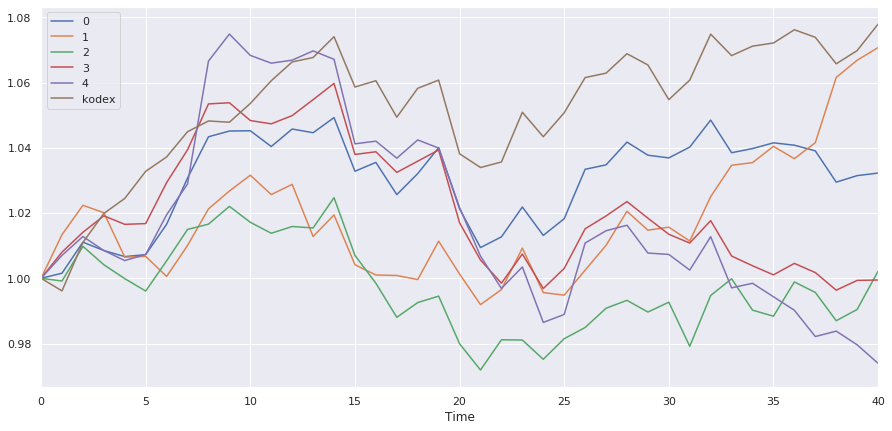

In [0]:
import matplotlib.pyplot as plt
#'롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산'
cluster_return.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
#fig.savefig(file_path+'/'+'output5_change_rate.png')

In [0]:
init_returns

In [0]:
y_kmeans
li_cl

[1, 95, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 33, 5, 1, 3, 2, 1, 1, 1]

In [0]:
# [0,1], [2~10], [11,13], [12], [14~19]

In [0]:
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_ch_np)
    Sum_of_squared_distances.append(km.inertia_)

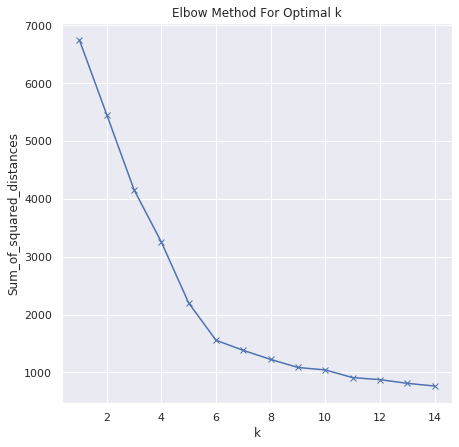

In [0]:
K = range(1,15)
fig = plt.figure(figsize=(7,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')

plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
#https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
from sklearn.metrics import silhouette_score

sil = [] 
for k in range(2, 14+1):
  kmeans = KMeans(n_clusters = k).fit(df_ch_np)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_ch_np, labels, metric = 'euclidean'))

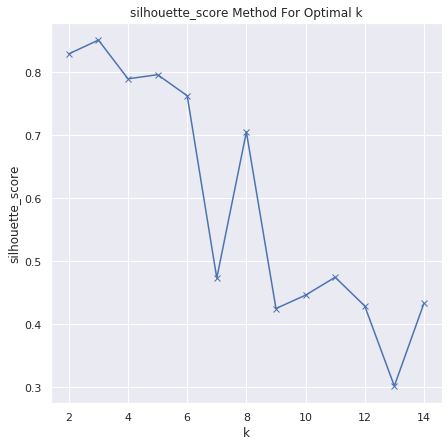

In [0]:
K = range(2,14+1)
fig = plt.figure(figsize=(7,7))
plt.plot(K, sil, 'bx-')

plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Method For Optimal k')
plt.show()

In [0]:
df_ch = data_new.drop(['Time'],axis=1)
df_ch.shape
df_ch.values.shape # (242, 156)

df_ch_np = df_ch.to_numpy()
df_ch_np = df_ch_np.T
df_ch_np.shape # (156, 242)

(156, 6)

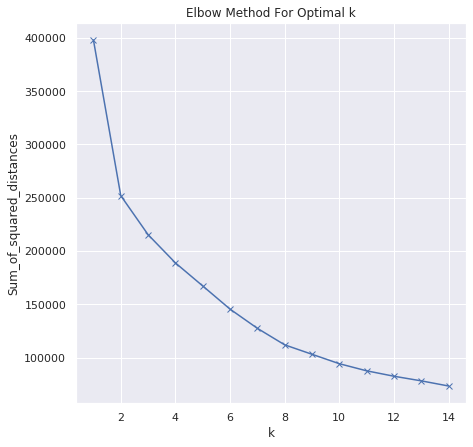

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_ch_np)
    Sum_of_squared_distances.append(km.inertia_)

fig = plt.figure(figsize=(7,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')

plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

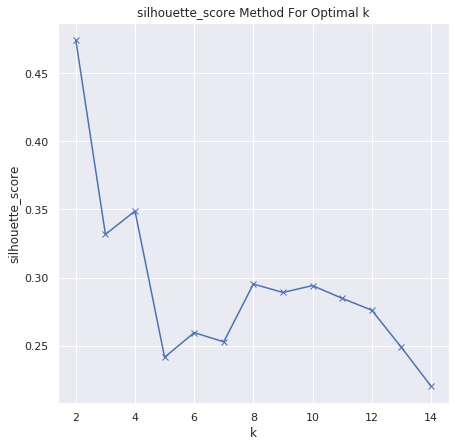

In [0]:
from sklearn.metrics import silhouette_score

sil = [] 
for k in range(2, 14+1):
  kmeans = KMeans(n_clusters = k).fit(df_ch_np)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_ch_np, labels, metric = 'euclidean'))

K = range(2,14+1)
fig = plt.figure(figsize=(7,7))
plt.plot(K, sil, 'bx-')

plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Method For Optimal k')
plt.show()

In [0]:
# for the long time

In [0]:
def get_trend(body):
    url = "https://openapi.naver.com/v1/datalab/search"

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type", "application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))

    return json.loads(response.read().decode('utf-8'))
print(len(kp_informations))
kp_informations_names = kp_informations.회사명.values.tolist()
idx = 0
drop_idx = []
i = 0
for name in kp_informations_names:
  if name not in kp200_names_list:
    drop_idx.append(i)
  i+=1
print(len(drop_idx))
kp200_inform = kp_informations.drop(drop_idx)
len(kp200_inform)

# 자동화를 위해, 그리고 같은 스케일을 가져오기 위해 하나씩 분석
from tqdm import tqdm
from datetime import datetime
names = kp200_inform.회사명.values
body_dict = {
    "startDate": "2016-01-01",
    "endDate": "2019-10-30",
    "timeUnit": "month",
}


for idx in tqdm(range(len(names))): # names
  name = names[idx]
  body_dict['keywordGroups'] = [{'groupName': name,'keywords':[name]}]
  body= json.dumps(body_dict)
  result = get_trend(body)
  
  if idx == 0 :
    data = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data])
    value = np.array([i['ratio'] for i in data])
    data = pd.DataFrame({'Time':time, idx : value})
  elif idx >= 1 : 
    data1 = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data1])
    value = np.array([i['ratio'] for i in data1])
    data1 = pd.DataFrame({'Time':time, idx : value})
    data = pd.merge(data,data1,on = ['Time'], sort= False)

  0%|          | 0/156 [00:00<?, ?it/s]

2323
2167


100%|██████████| 156/156 [01:57<00:00,  1.17it/s]


In [0]:
data.shape

(46, 157)

In [0]:
#data.to_excel("kp200_trend_timeseries.xlsx")
#data.to_csv(file_path+'/'+"kp200_trend_ts_month3.csv", mode='w') # 다시 불러올때 Time 형으로 변환, 굳이 필요한가 싶지만..

data_new = pd.read_csv(file_path+'/'+"kp200_trend_ts_month3.csv", index_col=0)
data_new.head(3)

data_new_change_rate = pd.DataFrame()
data_new_change_rate['Time'] = data_new['Time'][1:]
for i in range(156):
  trend_indexs = data_new[str(i)].values.tolist()
  changes = []
  for j in range(1,len(trend_indexs)):
    changes.append(trend_indexs[j]/trend_indexs[j-1] - 1)
  data_new_change_rate[str(i)] = changes

df_ch = data_new_change_rate.drop(['Time'],axis=1)
df_ch.shape
df_ch.values.shape # (242, 156)

df_ch_np = df_ch.to_numpy()
df_ch_np = df_ch_np.T
df_ch_np.shape # (156, 242)

(156, 45)

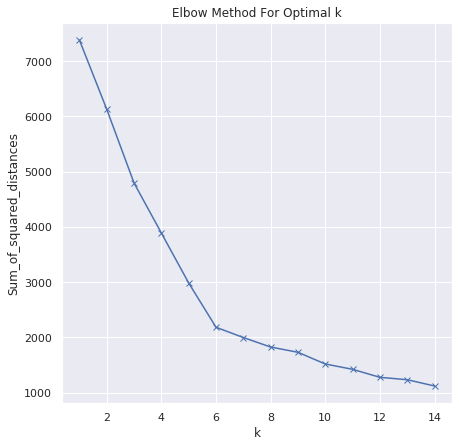

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_ch_np)
    Sum_of_squared_distances.append(km.inertia_)

fig = plt.figure(figsize=(7,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')

plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

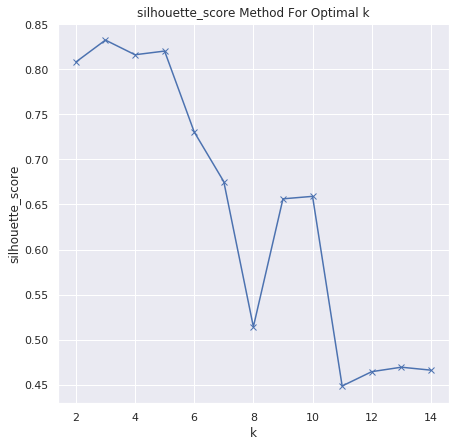

In [0]:
from sklearn.metrics import silhouette_score

sil = [] 
for k in range(2, 14+1):
  kmeans = KMeans(n_clusters = k).fit(df_ch_np)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_ch_np, labels, metric = 'euclidean'))

K = range(2,14+1)
fig = plt.figure(figsize=(7,7))
plt.plot(K, sil, 'bx-')

plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Method For Optimal k')
plt.show()

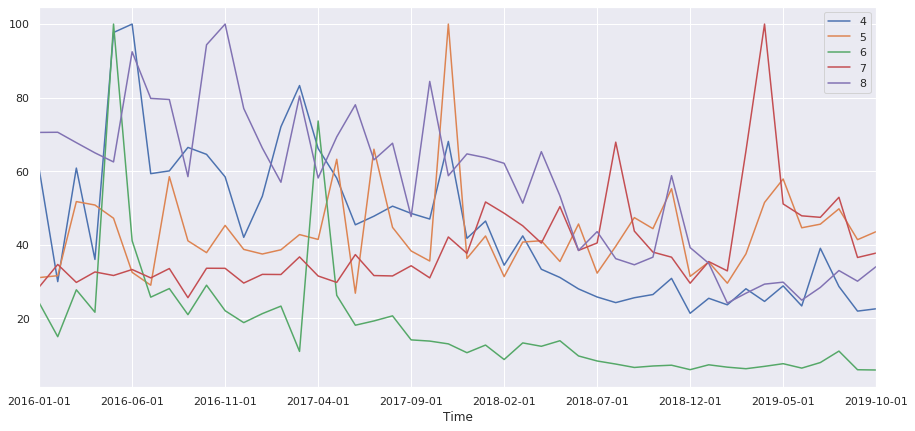

In [0]:
data_new_5 = data_new[['Time', '4','5','6','7','8']]
#'롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산'
data_new_5.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output5.png')

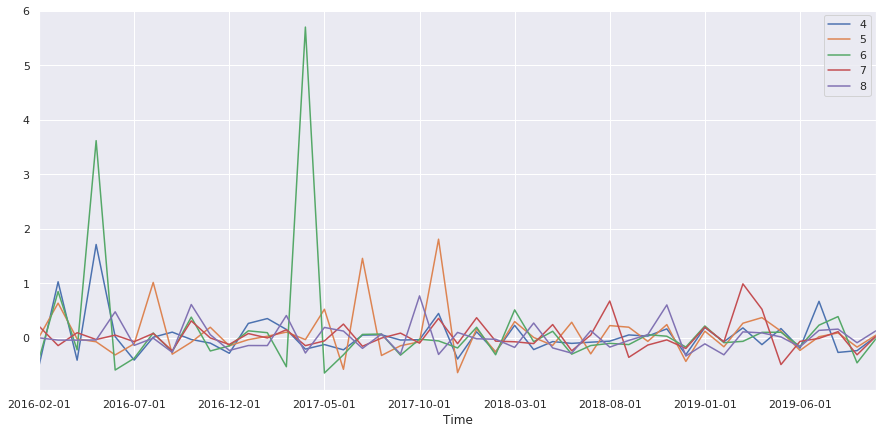

In [0]:
data_new_5 = data_new_change_rate[['Time', '4','5','6','7','8']]
#'롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산'
data_new_5.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output5_change_rate.png')

In [0]:
from tqdm import tqdm
wl = []
for i in tqdm(range(len(df_ch_np)),mininterval = 3):
    nearest = list(cos_matrix_multiplication(df_ch_np, df_ch_np[i]).argsort()[-11:-1][::-1])
    li = []
    for x in nearest:
        li.append(x)
    wl.append(li)
wl =  np.asarray(wl)
print(wl.shape)
#np.save(directory+'article_similarity_recent_t',wl)

100%|██████████| 156/156 [00:00<00:00, 7042.35it/s]

(156, 10)


In [0]:
for i in range(156):
  print('company name : ',names[i],end="'s ")
  print('most similarly company are :', end = ' ')
  for j in wl[i]:
    print(names[j], end= ' ')
  print()

company name :  세아제강's most similarly company are : 고려제강 대림산업 세방전지 삼광글라스 이수화학 신도리코 하나금융지주 현대모비스 LG하우시스 아모레퍼시픽 
company name :  한일시멘트's most similarly company are : 삼성증권 SK텔레콤 무림P&P 아이에스동서 LS산전 남해화학 대웅제약 이수화학 호텔신라 현대상선 
company name :  SK케미칼's most similarly company are : 두산중공업 대우건설 한국금융지주 S&T모티브 삼성전기 대한유화 OCI 동아쏘시오홀딩스 대원강업 SK하이닉스 
company name :  동아타이어's most similarly company are : NAVER 한국쉘석유 현대미포조선 고려제강 대림산업 금호타이어 한솔테크닉스 롯데쇼핑 현대제철 무림P&P 
company name :  롯데제과's most similarly company are : 한세실업 신도리코 삼성카드 롯데푸드 롯데쇼핑 LS산전 LS 에스원 만도 크라운제과 
company name :  오리온's most similarly company are : 대림산업 LS 일진머티리얼즈 오뚜기 롯데쇼핑 풍산 KPX케미칼 한화 한국금융지주 에스원 
company name :  크라운제과's most similarly company are : 남양유업 롯데제과 한세실업 동원F&B 빙그레 만도 엔씨소프트 두산 세아제강 삼성카드 
company name :  한솔제지's most similarly company are : 아이에스동서 휴켐스 웅진에너지 한국철강 모토닉 한국금융지주 세아베스틸 LG화학 넥센타이어 무림P&P 
company name :  삼성물산's most similarly company are : 에스엘 롯데케미칼 OCI 넥센타이어 휴켐스 NAVER 유한양행 코오롱 삼성생명 한전기술 
company name :  만도's most similarly company

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_ch_np)
y_kmeans = kmeans.predict(df_ch_np)

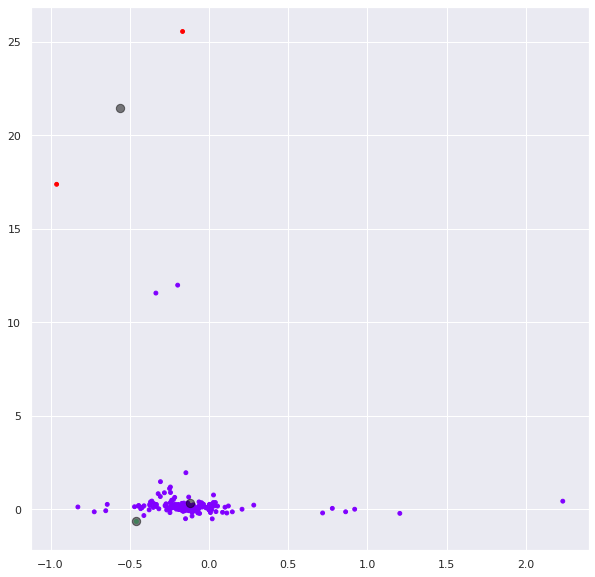

In [0]:
fig = plt.subplots(figsize=(10,10))
plt.scatter(df_ch_np[:, 34], df_ch_np[:, 41], c=y_kmeans, s=15, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 34], centers[:, 41], c='black', s=70, alpha=0.5);

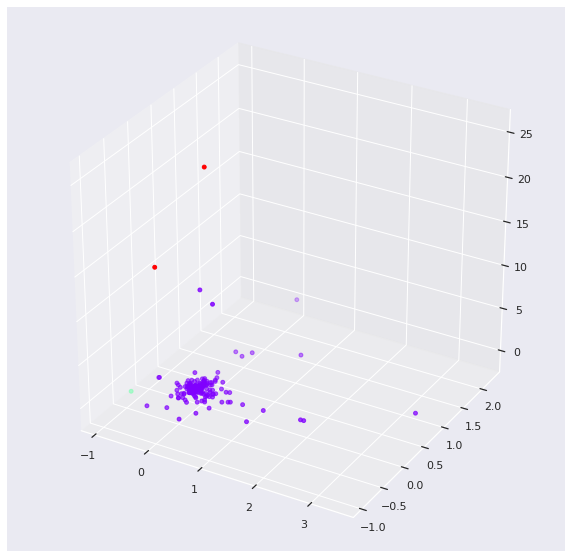

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_ch_np[:, 15], df_ch_np[:, 34],df_ch_np[:,41], c=y_kmeans, s=15, cmap='rainbow')

#centers = kmeans.cluster_centers_
#ax.scatter(centers[:, 3], centers[:, 7],df_ch_np[:,80], c='black', s=70, alpha=0.5);

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_ch_np)
y_kmeans = kmeans.predict(df_ch_np)

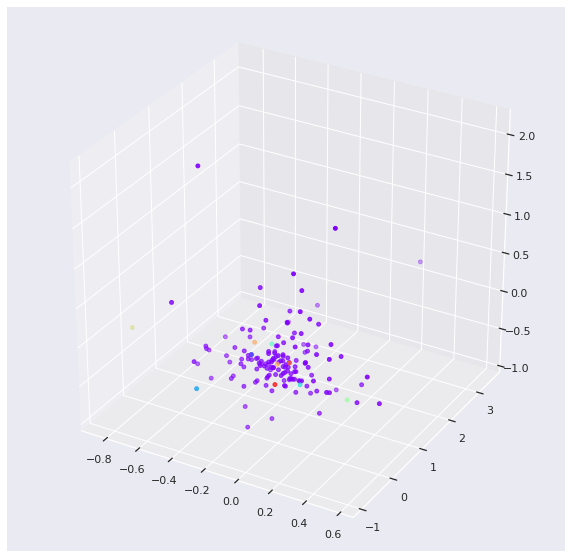

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_ch_np[:, 5], df_ch_np[:, 15],df_ch_np[:,20], c=y_kmeans, s=15, cmap='rainbow')

#centers = kmeans.cluster_centers_
#ax.scatter(centers[:, 3], centers[:, 7],df_ch_np[:,80], c='black', s=70, alpha=0.5);

Week

In [0]:
def get_trend(body):
    url = "https://openapi.naver.com/v1/datalab/search"

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type", "application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))

    return json.loads(response.read().decode('utf-8'))
print(len(kp_informations))
kp_informations_names = kp_informations.회사명.values.tolist()
idx = 0
drop_idx = []
i = 0
for name in kp_informations_names:
  if name not in kp200_names_list:
    drop_idx.append(i)
  i+=1
print(len(drop_idx))
kp200_inform = kp_informations.drop(drop_idx)
len(kp200_inform)

# 자동화를 위해, 그리고 같은 스케일을 가져오기 위해 하나씩 분석
from tqdm import tqdm
from datetime import datetime
names = kp200_inform.회사명.values
body_dict = {
    "startDate": "2016-01-01",
    "endDate": "2019-10-30",
    "timeUnit": "week",
}


for idx in tqdm(range(len(names))): # names
  name = names[idx]
  body_dict['keywordGroups'] = [{'groupName': name,'keywords':[name]}]
  body= json.dumps(body_dict)
  result = get_trend(body)
  
  if idx == 0 :
    data = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data])
    value = np.array([i['ratio'] for i in data])
    data = pd.DataFrame({'Time':time, idx : value})
  elif idx >= 1 : 
    data1 = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data1])
    value = np.array([i['ratio'] for i in data1])
    data1 = pd.DataFrame({'Time':time, idx : value})
    data = pd.merge(data,data1,on = ['Time'], sort= False)

  0%|          | 0/156 [00:00<?, ?it/s]

2323
2167


100%|██████████| 156/156 [02:00<00:00,  1.32it/s]


In [0]:
#data.to_excel("kp200_trend_timeseries.xlsx")
data.to_csv(file_path+'/'+"kp200_trend_ts_week3.csv", mode='w') # 다시 불러올때 Time 형으로 변환, 굳이 필요한가 싶지만..

data_new = pd.read_csv(file_path+'/'+"kp200_trend_ts_week3.csv", index_col=0)
data_new.head(3)

data_new_change_rate = pd.DataFrame()
data_new_change_rate['Time'] = data_new['Time'][1:]
for i in range(156):
  trend_indexs = data_new[str(i)].values.tolist()
  changes = []
  for j in range(1,len(trend_indexs)):
    changes.append(trend_indexs[j]/trend_indexs[j-1] - 1)
  data_new_change_rate[str(i)] = changes

df_ch = data_new_change_rate.drop(['Time'],axis=1)
df_ch.shape
df_ch.values.shape 

df_ch_np = df_ch.to_numpy()
df_ch_np = df_ch_np.T
df_ch_np.shape 

(156, 200)

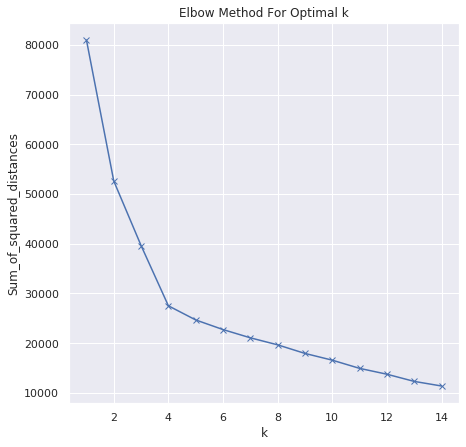

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_ch_np)
    Sum_of_squared_distances.append(km.inertia_)

fig = plt.figure(figsize=(7,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')

plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

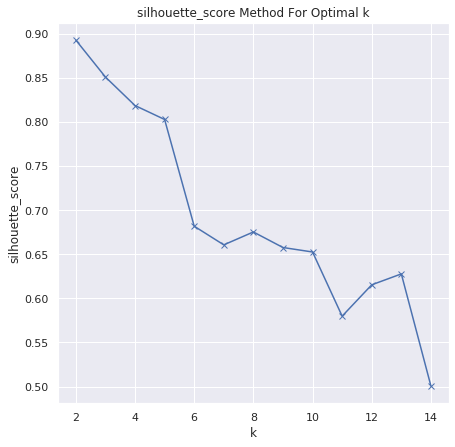

In [0]:
from sklearn.metrics import silhouette_score

sil = [] 
for k in range(2, 14+1):
  kmeans = KMeans(n_clusters = k).fit(df_ch_np)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_ch_np, labels, metric = 'euclidean'))

K = range(2,14+1)
fig = plt.figure(figsize=(7,7))
plt.plot(K, sil, 'bx-')

plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Method For Optimal k')
plt.show()

In [16]:
for i in [1,4,6,138,155]:
    print(i,'th. This is fine : ',names[i])

1 th. This is fine :  한일시멘트
4 th. This is fine :  롯데제과
6 th. This is fine :  크라운제과
138 th. This is fine :  삼성전자
155 th. This is fine :  CJ대한통운
